In [36]:

from importlib import reload

import numpy as np
import matplotlib.pyplot as plt
import mandelbrot_matrix

reload(mandelbrot_matrix)

plt.style.use('seaborn')

In [28]:
re_lim=(-2,1) 
im_lim=(-1,1)
data = []

In [40]:
n_sim = 500     # number of simulations to run``
n_size = 1000   # amount of ramdom points
threshold = 100 # threshold for mandelbrot

np.random.seed(SEED) # type:ignore
for sim in range(n_sim):
    re, im, n = mandelbrot_matrix.random_mandelbrot_points(n_size, re_lim, im_lim,threshold=threshold)
        
    count_inside = np.size(np.where(n>=threshold))
    
    # monte carlo
    total_points = n_size
    avg = count_inside/total_points
    data.append(avg)

In [ ]:

weights = np.ones_like(data) / len(data)
plt.hist(data,weights=weights, bins= 50, edgecolor='black')
plt.show()

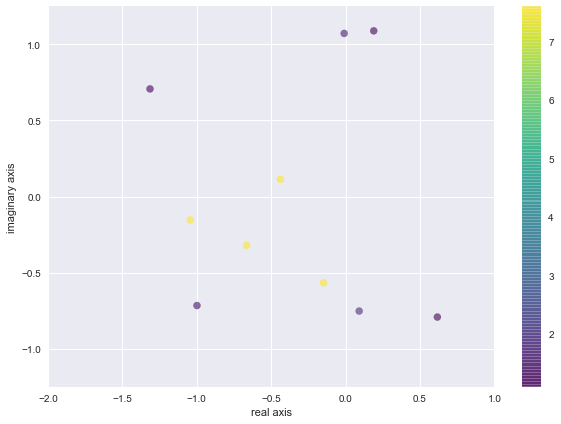

In [45]:
n_size_plot = 100000

re_lim=(-2,1) 
im_lim=(-1.25,1.25)
np.random.seed(SEED) #type: ignore
re, im, n = mandelbrot_matrix.random_mandelbrot_points(n_size_plot, re_lim, im_lim, threshold=2000)

plt.figure(figsize=(10,7))
plt.scatter(re,im,c=np.log(n),s=50,alpha=0.6, cmap="viridis")
plt.xlabel("real axis")
plt.ylabel("imaginary axis")
plt.xlim(re_lim)
plt.ylim(im_lim)
plt.colorbar()
# plt.savefig("figures/mandelbrot-random-plot-125-viridis.png", dpi=600)

24.729742812444016


In [53]:
# monte carlo
total_points = n_size
rectangle_area = 6
area_mandelbrot = (count_inside/total_points)*rectangle_area

print(area_mandelbrot)

# Google - area of the Mandelbrot set is approximately 1.506484, with a 95% confidence interval from 1.506480 to 1.506488

1.494


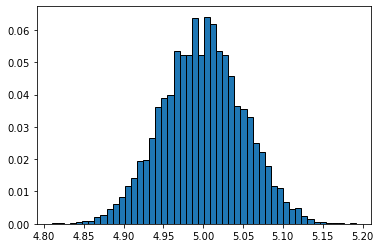

CPU times: user 3min 27s, sys: 275 ms, total: 3min 27s
Wall time: 3min 27s


In [17]:
%%time
# random variable values - 1 or 0(inside the mandelbrot or not)
import numpy as np
import matplotlib.pyplot as plt
data = []
# tossing a coin - 0 or 1
for sim in range(10000):
    sum = 0
    for i in range(10000):
        coin = np.random.randint(0, 2)
        #print(coin)
        sum += coin
    avg = sum/1000
    data.append(avg)
    
weights = np.ones_like(data) / len(data)
plt.hist(data,weights=weights, bins= 50, edgecolor='black')
plt.show()






In [13]:
print(np.random.randint(0, 2))

1


In [ ]:
alpha = 0.05
confidence interval = 95%
Z_0.025 = 1.96
actual_area_madelbrot = 1.506484

error_allowed = 1%

In [22]:
actual_area_madelbrot = 1.506484
print(actual_area_madelbrot*0.01)

0.01506484


l = 0.01506484

atop when $ 2*z_{α/2}*S / \sqrt{k} <  l $